In [1]:
%run setup_env.py
from algorithms.nn.nn import Sequential
from algorithms.nn.layers import Dense
import numpy as np
from algorithms.nn.loss import cross_entropy, cross_entropy_derivative
from algorithms.utils import compute_loss, compute_accuracy

# Visualizing Dataset

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
Y = digits.target



In [3]:
X = X.reshape(-1, 1, 8, 8)
X.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


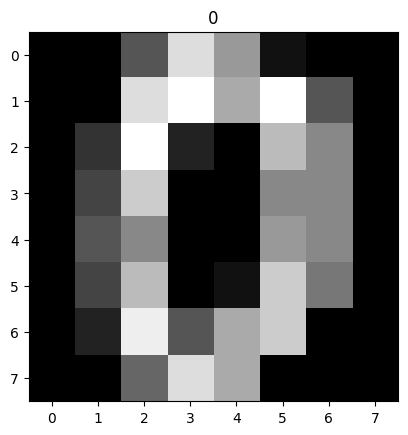

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [4]:
import matplotlib.pyplot as plt
def show_image(image, label):
    plt.imshow(image.squeeze(), cmap='gray') # image shape is [1, 28, 28] (colour channels, height, width)
    plt.title(label);
    plt.show()
    
show_image(X[0], Y[0])
X[0]

# Preparing Model

In [10]:
def train_model(model, X, Y, epochs):
    lr_max = 0.01
    lr_min = 0.00001
    samples = X.shape[0]
    for epoch in range(epochs):
        accuracy = 0
        loss_ep = 0
        lr = lr_max - (lr_max - lr_min) * epoch / epochs
        print(f"Epoch: {epoch}", end = ' ')
        for sample in range(samples):
            # forward pass
            x = X[sample]
            y = Y[sample]
            y_pred = model.forward(x)
            y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
            tru_val = np.argmax(y_pred)
            accuracy += tru_val == y

            masked_y = np.zeros((1,10))
            masked_y[0][y] = 1
            
            # loss computation
            loss = compute_loss(y_pred, masked_y, cross_entropy)
            loss_ep += loss
            
            # backward pass
            grad = cross_entropy_derivative(y_pred, masked_y)
            model.backward(grad, lr)
            
        print(f"Loss: {loss_ep}, Accuracy: {accuracy/samples}")

In [6]:
from algorithms.nn.layers import *

model = Sequential(
    layers = [
        Conv2D(n_channels= 1,num_filter = 8, kernel_size = (3,3)),
        Conv2D(n_channels= 8,num_filter = 16, kernel_size = (3,3)),
        MaxPool(),
        Flatten(),
        Sigmoid(),
        Dense(input_size= 144, output_size= 10),
        SoftMax()
    ]
)

model

Conv2D(num_filter=8, kernel_size=(3, 3), stride=1, padding=0) -> Conv2D(num_filter=16, kernel_size=(3, 3), stride=1, padding=0) -> MaxPool(pool_size=(2, 2), stride=1, padding=0) -> Flatten -> Sigmoid -> Layer(144, 10, None) -> SoftMax

In [12]:
train_model(model, X_train, Y_train,50)

Epoch: 0 Loss: 3882.949828277646, Accuracy: 0.24843423799582465
Epoch: 1 Loss: 3592.5855550410765, Accuracy: 0.2700069589422408
Epoch: 2 Loss: 3549.991421191631, Accuracy: 0.2985386221294363
Epoch: 3 Loss: 3258.7729165480173, Accuracy: 0.31941544885177453
Epoch: 4 Loss: 3120.7086790991048, Accuracy: 0.3521224773834377
Epoch: 5 Loss: 2818.0107700268863, Accuracy: 0.3743910925539318
Epoch: 6 Loss: 2770.8409044673276, Accuracy: 0.3924843423799583
Epoch: 7 Loss: 2705.7565729858225, Accuracy: 0.44676409185803756
Epoch: 8 Loss: 2742.6893976303163, Accuracy: 0.41475295755045233
Epoch: 9 Loss: 2566.3679286802344, Accuracy: 0.4551148225469729
Epoch: 10 Loss: 2448.3845151264013, Accuracy: 0.48643006263048016
Epoch: 11 Loss: 2478.4770758846544, Accuracy: 0.4704244954766875
Epoch: 12 Loss: 2453.5359699205987, Accuracy: 0.46903270702853167
Epoch: 13 Loss: 2366.2602969486093, Accuracy: 0.5059151009046625
Epoch: 14 Loss: 2272.1649776935665, Accuracy: 0.5184411969380655
Epoch: 15 Loss: 2213.2147135049

# Predictions

In [13]:
def predict(model, X):
    y_pred = model.forward(X)[0]
    return np.argmax(y_pred)

In [14]:
y_test_pred = np.array([predict(model, x) for x in X_test])
y_test_pred

/home/dikshant/Projects/MLAlgorithms/algorithms/nn/activations.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


array([6, 9, 3, 7, 2, 5, 5, 2, 5, 2, 1, 9, 4, 0, 0, 2, 3, 7, 5, 5, 6, 2,
       9, 7, 5, 2, 3, 5, 8, 3, 6, 3, 1, 6, 4, 6, 9, 4, 2, 6, 6, 9, 6, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 3, 0, 0, 1, 0, 0, 5, 1, 4, 5,
       7, 0, 4, 5, 9, 9, 5, 0, 7, 0, 7, 6, 9, 3, 0, 4, 8, 3, 8, 0, 5, 4,
       4, 9, 1, 3, 1, 3, 9, 3, 9, 0, 4, 6, 1, 3, 4, 3, 9, 7, 5, 9, 6, 3,
       7, 7, 4, 6, 1, 3, 2, 2, 0, 7, 3, 6, 4, 4, 0, 7, 8, 7, 5, 8, 8, 9,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 4, 9, 9, 6, 9, 0, 9, 5, 6, 6, 0,
       6, 4, 5, 3, 3, 5, 7, 2, 9, 0, 4, 5, 7, 4, 5, 4, 0, 2, 4, 2, 1, 1,
       7, 1, 3, 2, 3, 9, 8, 0, 3, 2, 7, 5, 6, 9, 9, 4, 2, 8, 9, 2, 9, 4,
       4, 8, 9, 3, 5, 7, 1, 5, 4, 8, 1, 5, 0, 0, 9, 8, 8, 8, 6, 0, 4, 2,
       2, 7, 1, 6, 0, 6, 6, 0, 3, 2, 3, 6, 7, 9, 9, 5, 8, 7, 8, 6, 1, 5,
       5, 7, 6, 8, 8, 8, 5, 5, 7, 6, 2, 2, 3, 8, 6, 4, 8, 3, 6, 0, 0, 7,
       2, 0, 1, 0, 4, 9, 8, 5, 3, 8, 0, 6, 1, 0, 0, 9, 6, 3, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 8, 0, 5, 8, 3, 6, 0, 4,

In [16]:
accuracy = np.mean(y_test_pred == Y_test)
accuracy

0.6416666666666667

<Axes: >

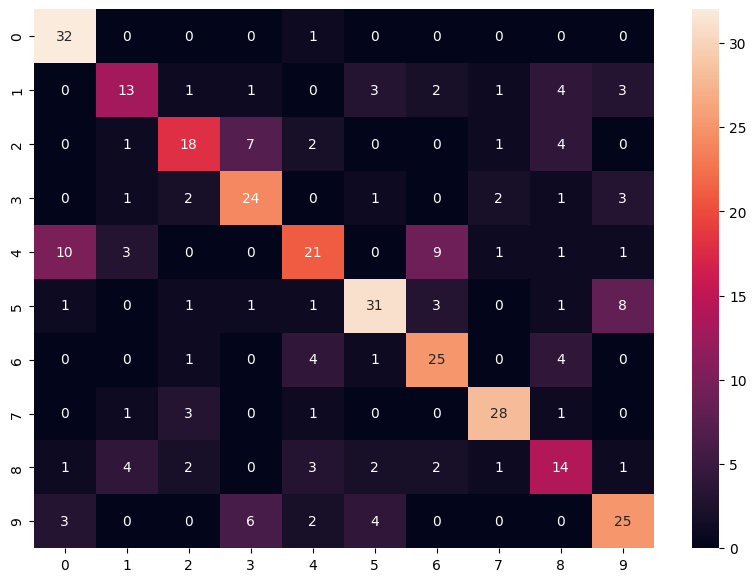

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(Y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True)


In [24]:
sample = 8
def show_sample(ax, image, label, prediction):
    ax.imshow(image.squeeze(), cmap='gray') # image shape is [1, 28, 28] (colour channels, height, width)
    ax.set_title(f"True label: {label}\nPredicted label: {prediction}");
    

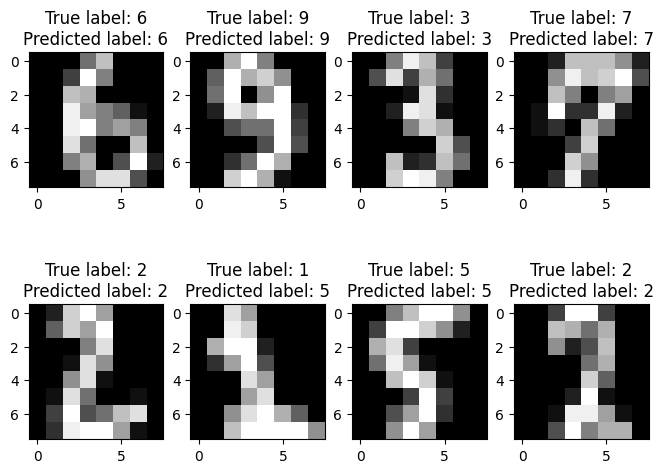

In [29]:
figsize = (8,6)
fig, ax = plt.subplots(2, 4, figsize=figsize)
for i in range(8):
    show_sample(ax[i//4][i%4], X_test[i], Y_test[i], y_test_pred[i])

plt.show()


# Conclusion
- Might have to try various types of models to get the best results
- First try small models to see what is benefitting
- Then try bigger models to see if it improves the results